In [6]:
# Import libraries
library(dplyr)
library(ggplot2)
library(magrittr)
library(nbpMatching)
library(tidyr)

cbsa_name,X1Q17newacct,X2Q17newacct,X3Q17newacct,X4Q17newacct,X1Q18newacct,X1Q17newbook,X2Q17newbook,X3Q17newbook,X4Q17newbook,...,X3Q17newsitter,X4Q17newsitter,X1Q18newsitter,TopMarket,dma_code,dma_name,total_pop,target_pop,total_hh,tv_hh
Albany-Schenectady-Troy NY,808,1410,2831,1895,1718,82,200,306,221,...,108,80,109,0,532,Albany-Schenectady-Troy,11189,173,574700,522590
Albuquerque NM,852,1245,1422,1209,999,137,259,291,269,...,94,110,68,0,790,Albuquerque-Santa Fe,14819,2242,748300,662570
Atlanta-Sandy Springs-Roswell GA,6274,12256,13374,11631,16856,1220,2776,3019,2534,...,1050,834,883,1,524,Atlanta,51937,6821,2520200,2385730
Austin-Round Rock TX,5240,7541,7471,7091,5832,1145,2257,2236,2319,...,850,656,641,1,635,Austin,16692,3274,824700,745640
Baltimore-Columbia-Towson MD,3299,6228,7248,5277,6316,716,1522,1781,1255,...,586,435,490,1,512,Baltimore,23447,376,1152000,1099890
Birmingham-Hoover AL,724,1158,1328,1156,1215,73,251,251,248,...,130,92,103,0,630,Birmingham (Ann and Tusc),14767,235,750000,686080


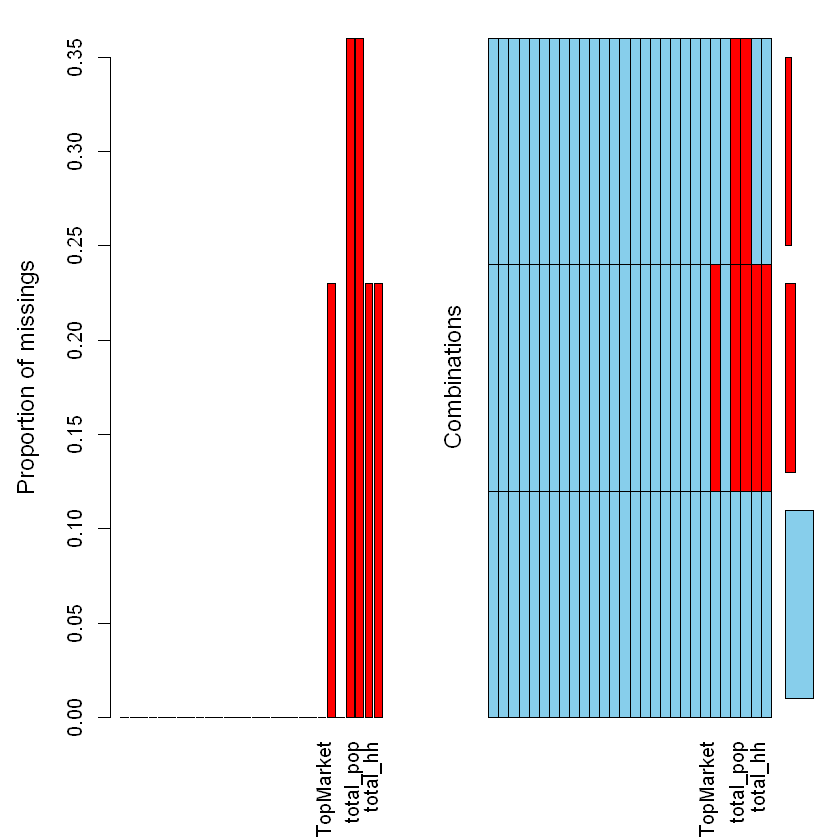

In [7]:
# Read input data
df<-read.csv(file = 'Data/Input.csv')

# Look for missing values
library(VIM)
aggr(df)
df%<>%filter(!is.na(total_pop))
df%>%head

In [3]:
# See if there are dups
df%>%group_by(dma_code)%>%summarise(count=n())%>%arrange(desc(count))%>%head

dma_code,count
501,1
504,1
505,1
506,1
508,1
510,1


In [4]:
# Create distance matrix
df_dist<-nbpMatching::gendistance(covariate = df,idcol = 23)
dist_matrix<-nbpMatching::distancematrix(df_dist)
dist_matrix%>%head

Warning message in nbpMatching::gendistance(covariate = df, idcol = 23):
"consider converting factor variables [cbsa_name, dma_name] before calling gendistance"

,532,790,524,635,512,630,506,514,571,517,...,819,881,609,555,539,789,671,744,544,511
532,0.000000,5.922118,9.504866,8.767870,5.516759,6.013559,8.809638,5.178580,5.838288,7.671588,...,8.976526,4.862420,6.064784,5.212846,8.311966,5.734393,5.459007,6.175863,6.933116,9.029392
790,5.922118,0.000000,8.480369,7.699423,6.343097,3.998697,8.110787,2.892846,3.134274,6.882018,...,8.630533,4.054788,5.010675,4.051671,6.150411,4.722715,2.932781,4.574982,4.781922,8.378139
524,9.504866,8.480369,0.000000,10.368286,8.334837,8.394703,10.328973,7.389067,8.182409,9.491043,...,11.022045,8.149499,8.242532,8.181951,9.673626,8.193448,8.005748,8.467172,8.756994,10.746293
635,8.767870,7.699423,10.368286,0.000000,8.138662,7.620290,9.535645,6.695903,7.658934,8.820514,...,10.509786,7.805710,7.841107,6.874328,9.222757,7.629897,7.072693,7.163650,8.248081,10.007294
512,5.516759,6.343097,8.334837,8.138662,0.000000,5.589092,8.456626,4.821741,5.863459,7.431587,...,8.788178,5.002675,6.534900,4.571849,7.107382,6.764130,5.182057,5.851472,7.548855,7.943204
630,6.013559,3.998697,8.394703,7.620290,5.589092,0.000000,7.090662,3.402509,3.709902,6.851260,...,8.314380,4.080498,4.649030,2.850113,5.621766,3.995839,3.385438,2.353091,4.798518,8.146930


In [5]:
# Reformat distance matrix to show pairs side by side
matched_df<-nonbimatch(dist_matrix)
matched_pairs<-get.sets(matched_df,remove.unpaired = T)
matched_pairs%>%head

dma_pairs<-levels(matched_pairs)
dma_pairs%>%head

write.csv(dma_pairs, file = "DMAPairs.csv")
write.csv(dist_matrix, file = "DistMatrix.csv")

532     790     524     635     512     630 
532-616 514-790 506-524 635-659 512-560 563-630 
32 Levels: 501-803 504-862 505-534 506-524 508-622 510-641 511-613 ... 820-825

[1] "501-803" "504-862" "505-534" "506-524" "508-622" "510-641"